# 2019 StudentMoveTO Survey Data - Tabulation

In this notebook, we tabulate the data from the __2019 StudentMoveTO Survey__. This includes paying specific attention to factors such as age, gender, the distribution of respondents by affiliated university and campus, their main mode of transportation, or their family structure. This report is divided into 4 main parts:

1. Tabulation of Respondents File
2. Tabulation of Household File
3. Main Conclusions from Respondents and Households files
4. Notes about Trip Diaries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

ps_df = pd.read_csv('../../Data/SMTO_2019/SMTO_2019_Respondents.csv', low_memory=False)
hh_df = pd.read_csv('../../Data/SMTO_2019/SMTO_2019_Households.csv')
df = pd.concat([ps_df, hh_df], axis=1)

We'll use the following function to display value counts.

In [2]:
def show_distribution(df, col_name, attribute):
    def max_len(values):
        return len(max(values, key=len))
    
    def str_to_len(string, length):
        return string[:length-2] if len(string) >= length else " " * (length - len(string) - 2) + string
    
    # Include quotations on col_name and attribute
    attrib = list(df[col_name].value_counts().index)
    counts = list(df[col_name].value_counts())
    percnt = list(df[col_name].value_counts(normalize = True))

    max_len = ((int((max_len(attrib + [attribute]) + 1)/8)) + 1) * 8
    
    print(str_to_len(attribute, max_len + 1) + "\t Count\tPercentage")
    for i in range(len(attrib)):
        print(str_to_len(str(attrib[i]), max_len + 1) + '\t ' + str(counts[i]) + '\t' + "{:2.2%}".format(percnt[i]))


# 1. Tabulation of Respondents File

This section of the tabulation was done with data from `SMTO_2019_Respondents.csv`.

In [3]:
df.head()

,UniquePsKey_,PsKey_,psgender,psage,psinstitution,psinternationalstudent,psdisability,psuniversityaffiliation,personstatusgrad,personstatustime,...,hhownership,familyincomelevel,HmCTuid,HmTTS2006,HmPD,HmRegion,HmFSA2016,tripsdatekey,TolTp,surveyComplDate
0,1,9,Male,26.0,Centennial College,Yes,No,NaN,NaN,NaN,...,Unknown,NaN,5350527.01,3851.0,36.0,4.0,L5B,10/2/2019,NaN,10/3/2019
1,2,11,Female,25.0,Centennial College,No,No,NaN,NaN,NaN,...,Tenant,NaN,5350287.02,181.0,4.0,1.0,M6A,10/2/2019,3.0,10/3/2019
2,3,14,Male,19.0,Centennial College,No,No,NaN,NaN,NaN,...,Tenant,I don't know,5350804.07,1039.0,20.0,2.0,L1V,10/2/2019,2.0,10/3/2019
3,4,16,Female,25.0,Centennial College,Yes,No,NaN,NaN,NaN,...,NaN,NaN,5350133,191.0,4.0,1.0,M5N,10/2/2019,NaN,10/3/2019
4,5,17,Female,97.0,Centennial College,No,No,NaN,NaN,NaN,...,Owner,NaN,5350378.22,600.0,16.0,1.0,M1V,10/2/2019,2.0,10/3/2019


In [4]:
df.shape

(19135, 89)

The sample size has increased from 2015 where we had __15,226__ respondents to 2019 where we now have __19,135__.

### 1.1 Gender Distribution

In [5]:
show_distribution(df, 'psgender', 'Gender')

                         Gender	 Count	Percentage
                         Female	 12744	66.60%
                           Male	 5905	30.86%
           Prefer not to answer	 253	1.32%
      Non binary / third gender	 233	1.22%


We still have a much higher number of females than males in this dataset - an almost identical split by gender to the 2015 dataset. We also have the Addition of a 'Prefer not to answer' option.

### 1.2 Age Distribution

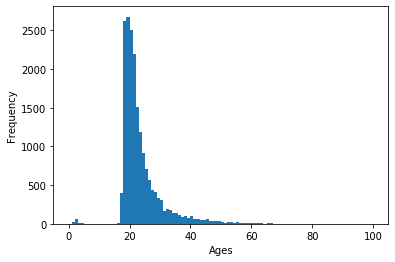

In [6]:
temp_df = df[df['psage'] < 200]
numBins = 100
plt.figure()
temp_df['psage'].plot.hist(bins=numBins)
plt.xlabel('Ages')
plt.show()

In [7]:
(df["psage"] == 999).sum()

67

Same as in the 2015 SMTO data, we see that the majority of respondents reported ages between 19 and 25 years old. The 2019 SMTO age distribution is almost identical to the 2015 distribution. Note that 67 rows have unknown ages, reported as 999.

### 1.3 University/College & Campus Distributions

In [8]:
show_distribution(df, 'psinstitution', 'School')

                         School	 Count	Percentage
          University of Toronto	 5413	28.29%
             Ryerson University	 4090	21.37%
                York University	 2386	12.47%
            McMaster University	 1756	9.18%
             Centennial College	 1234	6.45%
                 Durham College	 1225	6.40%
               Sheridan College	 1168	6.10%
        Ontario Tech University	 738	3.86%
                 Mohawk College	 687	3.59%
                OCAD University	 438	2.29%


Unlike the 2015 SMTO dataset, the 2019 survey included additional university options as well as the inclusion of colleges. The newly represented institutions are:

- McMaster University
- Centennial College         
- Durham College             
- Sheridan College           
- Ontario Tech University (UOIT)     
- Mohawk College     

With the addition of these universities and colleges, we have a much longer list of campuses, as displayed below. 

In [9]:
show_distribution(df, 'pscampusmain', 'Campus')

                                         Campus	 Count	Percentage
                              St. George Campus	 3571	26.73%
                                   Keele Campus	 2062	15.43%
                                McMaster Campus	 1601	11.98%
                                  Oshawa Campus	 916	6.86%
                             Scarborough Campus	 761	5.70%
                             Mississauga Campus	 740	5.54%
                                Progress Campus	 530	3.97%
                            North Oshawa Campus	 522	3.91%
                   Fennell Campus (Main Campus)	 522	3.91%
                Trafalgar Road Campus, Oakville	 443	3.32%
                         Davis Campus, Brampton	 361	2.70%
                             Morningside Campus	 281	2.10%
            Hazel McCallion Campus, Mississauga	 240	1.80%
                                 Glendon Campus	 150	1.12%
                                  Whitby Campus	 148	1.11%
                         Downtown Oshawa Ca

Let us see the breakdown by institution type:

In [10]:
num_uni = df['psinstitution'].apply(lambda x: "University" in x).sum()
print("Number of University Students:", num_uni)
print("Number of College Students:", len(df['psinstitution']) - num_uni)

Number of University Students: 14821
Number of College Students: 4314


Even though college students were also surveyed, we can see that they represent only __23%__ of respondents, making university students a much more represented group. Also note that affiliation information was only available for 17469 of the 19135 students surveyed. There does not seem to be a pattern for which students did not indicate their affiliations.

We also noticed that not every respondent who answered the question about their post-secondary school also answered the question about their campus. As we can see below:

In [11]:
total = 0
for i in list(df['psinstitution'].value_counts()):
    total = total + i
print('TOTAL COUNTS for psinstitution: ' + str(total))

total = 0
for i in list(df['pscampusmain'].value_counts()):
    total = total + i
print('TOTAL COUNTS for pscampusmain: ' + str(total))

TOTAL COUNTS for psinstitution: 19135
TOTAL COUNTS for pscampusmain: 13361


In [12]:
school_counts = list(df['psinstitution'].value_counts())
schools = list(df['psinstitution'].value_counts().index)
for i in range(len(schools)):
    temp_df = df[df['psinstitution'] == schools[i]]
    print(str(schools[i]) + ' COUNTS: ' + str(school_counts[i]))
    total = 0
    temp_counts = list(temp_df['pscampusmain'].value_counts())
    for j in range(len(temp_counts)):
        total = total + temp_counts[j]
    print('# of Students who Answered about Campus: ' + str(total))
    print()
    print(temp_df['pscampusmain'].value_counts())
    
    print("\n\n")

University of Toronto COUNTS: 5413
# of Students who Answered about Campus: 5072

St. George Campus     3571
Scarborough Campus     761
Mississauga Campus     740
Name: pscampusmain, dtype: int64



Ryerson University COUNTS: 4090
# of Students who Answered about Campus: 0

Series([], Name: pscampusmain, dtype: int64)



York University COUNTS: 2386
# of Students who Answered about Campus: 2212

Keele Campus      2062
Glendon Campus     150
Name: pscampusmain, dtype: int64



McMaster University COUNTS: 1756
# of Students who Answered about Campus: 1640

McMaster Campus                       1601
Burlington Campus/Ron Joyce Centre      39
Name: pscampusmain, dtype: int64



Centennial College COUNTS: 1234
# of Students who Answered about Campus: 1037

Progress Campus                                530
Morningside Campus                             281
Ashtonbee Campus                               114
Story Arts Centre                               72
Downsview Campus                  

As we can see, students in universities like Ryerson or OCAD that only have one campus did not respond about which campus they attended. This is easy to fix because we can simply add 

### 1.4 International Students Distribution

In [13]:
show_distribution(df, 'psinternationalstudent', "Intl?")

  Intl?	 Count	Percentage
     No	 15644	85.36%
    Yes	 2684	14.64%


This survey asked about whether the students were international or not, and we can see that the number of domestic students is much greater than the international ones. 

### 1.5 University Affiliation Distribution

In [14]:
show_distribution(df, 'personstatustime', 'Status')

 Status	 Count	Percentage
     FT	 12745	93.07%
     PT	 655	4.78%
  Other	 294	2.15%


For university students, we have a very similar FT/PT distribution in comparison to 2015.

In [15]:
show_distribution(df, 'psuniversityaffiliation', 'Affiliation')

                            Affiliation	 Count	Percentage
                Full-Time Undergraduate	 10230	74.70%
                     Full-Time Graduate	 2515	18.37%
                Part-Time Undergraduate	 416	3.04%
                     Part-Time Graduate	 239	1.75%
                   Continuing Education	 183	1.34%
           Other, e.g. exchange student	 96	0.70%
      Not applicable / No longer attend	 15	0.11%


Similar to 2015, the most represented groups of university sutdents are those full-time undergrad and graduate students, with a much higher number of undergraduate full-time students (as expected).

In [16]:
show_distribution(df, 'psinstitutioninvolvedyears', "Enrollment Year")
numOfFY = (((df['psuniversityaffiliation'] == 'Full-Time Undergraduate') | (df['psuniversityaffiliation'] == 'Part-Time Undergraduate')) & (df['psinstitutioninvolvedyears'] == '2019')).sum()
print("\nNumber of First-Year Undergrads:", numOfFY)

        Enrollment Year	 Count	Percentage
                   2019	 6067	34.66%
                   2018	 4110	23.48%
                   2017	 2873	16.41%
                   2016	 2116	12.09%
                   2015	 1028	5.87%
        2013 or earlier	 846	4.83%
                   2014	 466	2.66%

Number of First-Year Undergrads: 3025


We were able to find the number of first-year undergrads by counting how many undergraduate students enrolled in 2019. We found that we have pretty much the same distribution of First-year undergrad studets in the 2019 SMTO survey as in 2015.

### 1.6 College Affiliation Distribution

In [17]:
show_distribution(df, 'pscollegeaffiliation', 'FT/PT')

                  FT/PT	 Count	Percentage
              Full-Time	 3521	93.27%
             Part-Time 	 158	4.19%
   Continuing Education	 96	2.54%


For our smaller sample college students, most of them are full-time.

In [18]:
show_distribution(df, 'psyearofstudy', 'Year')

                   Year	 Count	Percentage
               1st year	 2006	53.17%
               2nd year	 1259	33.37%
               3rd year	 378	10.02%
     4th year or higher	 130	3.45%


Also, more than half of them are in their first year of college.

### 1.7 Transportation Mode Distribution

                                                           Mode	 Count	Percentage
                                                    Transit Bus	 2811	25.19%
                                                      Subway/RT	 2129	19.08%
                                                           Walk	 2036	18.25%
                                                    Drive alone	 1104	9.89%
                                                       GO Train	 880	7.89%
                                                         GO Bus	 560	5.02%
                                                        Bicycle	 373	3.34%
 Paratransit service (e.g., bus transport for disabled persons)	 262	2.35%
                  Auto passenger (driver is a household member)	 202	1.81%
                                                      Streetcar	 170	1.52%
               Drive with passenger(s) (household members only)	 149	1.34%
                        Accessibility adapted vehicle as driver	 100	0.90%
      Drive

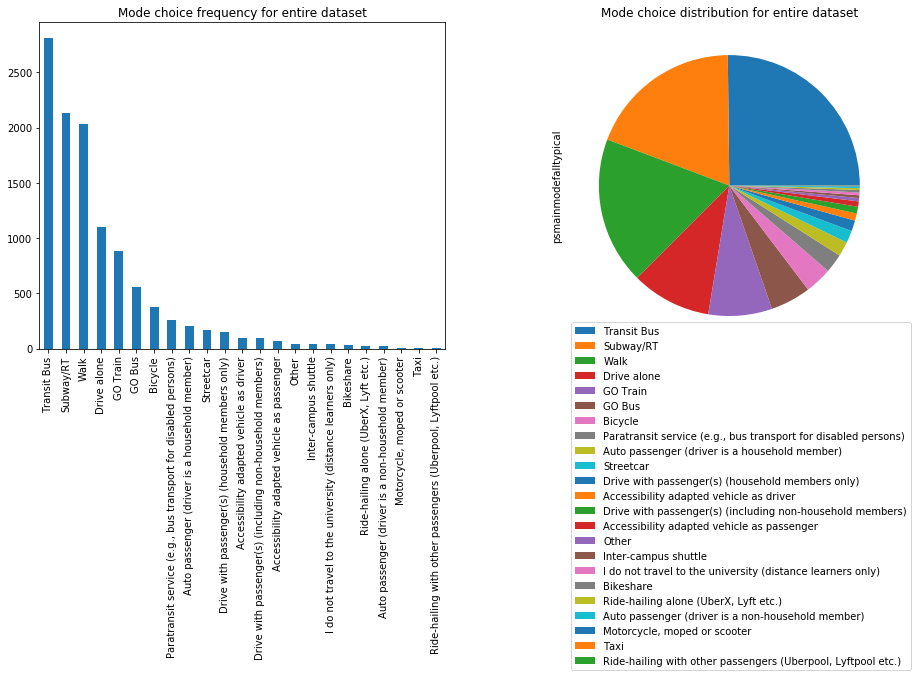

In [19]:
show_distribution(df, 'psmainmodefalltypical', 'Mode')

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Mode choice frequency for entire dataset')
df['psmainmodefalltypical'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
df['psmainmodefalltypical'].value_counts().plot.pie(labeldistance=None)
plt.legend(bbox_to_anchor=(0, -1), loc="lower left")
plt.title('Mode choice distribution for entire dataset')
plt.show()

Ther first thing to note is that the 2019 Survey has a few more mode choice options. These new options that did not appear in 2015 are:

- Accessibility adapted vehicle as driver
- Accessibility adapted vehicle as passenger
- Bikeshare
- Drive with passenger(s) (household members only)
- Drive with passenger(s) (including non-household members)
- Auto passenger (driver is a household member)
- Auto passenger (driver is a non-household member)
- Ride-hailing alone (UberX, Lyft etc.)
- Ride-hailing with other passengers (Uberpool, Lyftpool etc.)

As we can see, most of these new modes are different ways of driving to school. A possible next step coule be to aggregate the modes a bit more, so that modes with similar characteristics are joined (eg. adding up different driving methods), and that way we will be able to get more relevant distributions. 

Anyway, we can see that local transit (transit bus and Subway/RT) have the biggest distributions followed by walking and driving, and regional transit (GO Train and GO Bus). It is also curious to see that the percentage of cyclists has gone down from 2019 to 2015 from __6.8%__ to __3.3%__. This could be due to the increased number of campuses that are not located in large city cores. 

In [20]:
mode_counts = list(df['psmainmodefalltypical'].value_counts())
print('Percentage: ' + str(sum(mode_counts)/19135))

Percentage: 0.5831721975437679


However, we can see that only 58% of respondents gave information about their travel mode. This is not ideal because our sample size goes down by almost half when analyzing mode choice.

### 1.8 Transportation Costs

In [21]:
df['psmonthlytravelcost'].describe()

count    16918.000000
mean       221.530618
std        207.558443
min          0.000000
25%         90.000000
50%        150.000000
75%        300.000000
max       1500.000000
Name: psmonthlytravelcost, dtype: float64

This survey also provides us with the monthly transportation cost for each respondent. __This information may be really useful when introducing cost variables into our mode choice logit models__.

### 1.9 Car Availability

In [22]:
show_distribution(df, 'psautoavailability', 'Car Available?')

 Car Available?	 Count	Percentage
             No	 11292	65.54%
            Yes	 5936	34.46%


In [23]:
print("# Cars  Counts")
df['hhvehiclenumber'].value_counts()

# Cars  Counts


0.0     3649
1.0     3182
2.0     2941
3.0     1190
4.0      390
5.0       81
6.0       21
7.0        3
8.0        3
20.0       2
10.0       1
Name: hhvehiclenumber, dtype: int64

We have a higher number of studetns who claim to have one or more cars than students who say that they have an available vehicle, meaning that not every respondents who owns a car is able to use if for commuting purposes. 

### 1.10 Financial Support

In [24]:
show_distribution(df, 'familysupporteducation', 'Family Support')

         Family Support	 Count	Percentage
        Partial support	 4549	39.92%
           Full support	 3441	30.19%
             No support	 3406	29.89%


Financial support was a new attribute introduced in the 2019 survey, which may be an interesting variable to work with. 

# 2. Tabulation of Household File
This section of the tabulation was done with data from `SMTO_2019_Households.csv`.

### 2.1 Living Situation

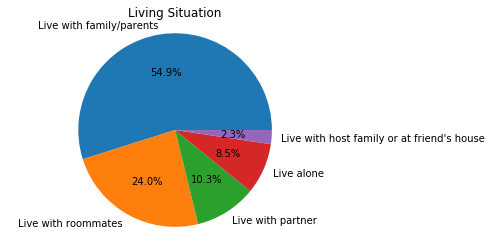

In [25]:
fig, ax = plt.subplots()
labels= list(df['hhlivingsituation'].value_counts().index)
ax.pie(df['hhlivingsituation'].value_counts(), labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Living Situation')
plt.show()

Living arrangement distribution in the 2019 Survery looks very similar to the 2015 one with the exception that there is a new option for living with host family or at friend's house. 

### 2.2 Family Structure

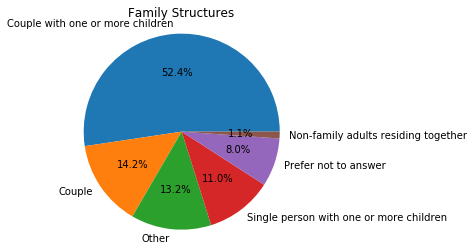

In [26]:
fig, ax = plt.subplots()
labels= list(df['hhstructure'].value_counts().index)
ax.pie(df['hhstructure'].value_counts(), labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Family Structures')
plt.show()

This survey also gives us information about the family structures of those students who claim to live with their families or partners. We can see that more than half of these students live in traditional households with a couple that have one or more children. Out of the 7565 respondents that said they lived with their families or with a partner, 7539 of them gave an answer for the family structure question. So only 26 did not respond.

This family structure may be used for segmentation purposes because those students living with parents, for example, may live in very different areas that those living as a couple, and their commutes may differ a lot. 

### 2.3 Building Type

In [27]:
show_distribution(df, 'hhbuildingtype', 'Home Type')

                              Home Type	 Count	Percentage
                  Single detached house	 4668	40.72%
                     Apartment or Condo	 3311	28.88%
               Row/Townhouse (attached)	 1161	10.13%
                    Semi-detached house	 1086	9.47%
                    On-campus residence	 678	5.91%
                   Prefer not to answer	 256	2.23%
                           I don't know	 206	1.80%
     Other (Ex: mobile home, chalet...)	 97	0.85%


We also obtained information about the building type of each student. An important thing to note is that out of the 19,135 student respondents, only 11,463 of them provided an answer for this question. 

The most useful thing here is that we now have information about how many students live on campus. There are __678__ students who claim to live on residence. Let us quickly analyze only this group.

#### 2.3.1 On-Campus Residents

In [28]:
on_res = df[df['hhbuildingtype'] == "On-campus residence"]
show_distribution(on_res, 'psinstitution', 'School')

                         School	 Count	Percentage
          University of Toronto	 304	44.84%
            McMaster University	 92	13.57%
                York University	 83	12.24%
             Ryerson University	 67	9.88%
               Sheridan College	 48	7.08%
        Ontario Tech University	 27	3.98%
                 Durham College	 26	3.83%
             Centennial College	 23	3.39%
                OCAD University	 4	0.59%
                 Mohawk College	 4	0.59%


First, we see that the University of Toronto is the largest source of on-campus residents, with almost half. However, all ten institutions had respondents who listed themselves as on-campus residents.

In [29]:
show_distribution(on_res, 'psinternationalstudent', 'Intl?')

  Intl?	 Count	Percentage
     No	 479	70.65%
    Yes	 199	29.35%


As could be expected, the proportion of international students is higher for students living on-campus. However, it remains relatively small at 30%, suggesting a possible underrepresentation of this group.

In [30]:
show_distribution(on_res, 'psuniversityaffiliation', 'Affiliation')

                    Affiliation	 Count	Percentage
        Full-Time Undergraduate	 511	88.56%
             Full-Time Graduate	 55	9.53%
   Other, e.g. exchange student	 6	1.04%
             Part-Time Graduate	 3	0.52%
        Part-Time Undergraduate	 2	0.35%


The majority of university students living on-campus are undergraduates, and the vast majority are full-time students.

In [31]:
show_distribution(on_res, 'pscollegeaffiliation', 'Status')

         Status	 Count	Percentage
      Full-Time	 100	99.01%
     Part-Time 	 1	0.99%


This pattern holds true for college students as well.

In [32]:
show_distribution(on_res, 'psinstitutioninvolvedyears', 'Enrollment Year')

        Enrollment Year	 Count	Percentage
                   2019	 469	69.17%
                   2018	 107	15.78%
                   2017	 54	7.96%
                   2016	 31	4.57%
                   2015	 12	1.77%
        2013 or earlier	 5	0.74%


According to this, the majority of on-campus residents at universities are first-years. This is expected, as residence is often guaranteed for this group and upper-year students choose to live off-campus. Let us make a similar query for college on-campus residents.

In [33]:
show_distribution(on_res, 'psyearofstudy', 'Year')

           Year	 Count	Percentage
       1st year	 78	77.23%
       2nd year	 16	15.84%
       3rd year	 7	6.93%


Again, first-year students are overrepresented among those students living on-campus.

In [34]:
show_distribution(on_res, 'psmainmodefalltypical', 'Mode')

                                                           Mode	 Count	Percentage
                                                           Walk	 500	75.64%
                                                    Transit Bus	 57	8.62%
                                                      Subway/RT	 25	3.78%
     I do not travel to the university (distance learners only)	 14	2.12%
 Paratransit service (e.g., bus transport for disabled persons)	 13	1.97%
                                                        Bicycle	 10	1.51%
                                                         GO Bus	 7	1.06%
                                           Inter-campus shuttle	 6	0.91%
                                                    Drive alone	 5	0.76%
                                                          Other	 5	0.76%
                  Auto passenger (driver is a household member)	 5	0.76%
                          Ride-hailing alone (UberX, Lyft etc.)	 3	0.45%
                                  

Predictably, the majority of on-campus residents walk to campus. Several more use local transit, while a handful of students use other modes.

In [35]:
on_res['numroommates'].value_counts()

1.0     255
3.0     112
5.0      32
2.0      23
4.0      22
7.0       5
6.0       3
50.0      3
15.0      1
12.0      1
20.0      1
35.0      1
11.0      1
Name: numroommates, dtype: int64

460 on-campus residents indicated having roommates. Most of these had one other roommate, and the majority had five or fewer roommates.

In [36]:
on_res['HmTTS2006'].value_counts()

5198.0    82
70.0      62
69.0      60
47.0      55
38.0      47
          ..
1124.0     1
490.0      1
4016.0     1
52.0       1
2257.0     1
Name: HmTTS2006, Length: 62, dtype: int64

We would expect that only several zones be included in this column for students indicating they lived on campus, but a total of 62 zones are listed. The most frequent zones can be attributed to McMaster University, the University of Toronto, or Ryerson University. It would be interesting to verify how good of an indicator living in one of these zones is of attending a certain school.

### 2.4 Family Income Distribution

In [37]:
show_distribution(df, 'familyincomelevel', 'Family Income')

          Family Income	 Count	Percentage
           I don't know	 1290	16.44%
   Prefer not to answer	 807	10.28%
      $ 15,000 - 29,999	 647	8.24%
    $ 100,000 - 124,999	 623	7.94%
      $ 50,000 - 59,999	 541	6.89%
     Less than $ 14,999	 512	6.52%
      $ 40,000 - 49,999	 491	6.26%
      $ 30,000 - 39,999	 483	6.15%
      $ 60,000 - 69,999	 457	5.82%
      $ 70,000 - 79,999	 357	4.55%
      $ 80,000 - 89,999	 340	4.33%
            $ 200,000 +	 333	4.24%
      $ 90,000 - 99,999	 330	4.20%
    $ 125,000 - 149,999	 319	4.06%
    $ 150,000 - 199,999	 319	4.06%


In 2019, the number of income classes has increased, with students being able to select a lot more specific ranges. A large portion of students either do not know their income class or preferred not to indicate it. This question was only asked to respondents who receive financial support (either full or partial) from family for their education and other related costs. As we saw earlier, only about 2/3 of the respondents received financial support.

__NOTE:__ In the 2015 survey we have information about __Household Income__, but we do not know if it was only asked to those respondents living with families or not.We also do not know if the question asked about their family’s household OR their current household.This makes a big difference because if by household they meant "current household", then many of the low incomes might have been due to the fact that many students living alone do not have jobs, and if they do, they are usually lower paid jobs. However, for 2019 we know that the question specifically asked:  _"Please indicate your gross family income level (before taxes) in 2018"_. This means that this time, the question about income particularly asks about thier family household income.  

# 3. Main Conclusions from `Respondents` and `Households` files

- From 2015 to 2019 we have gained a broader set of university of college campuses represented, meaning we can more completely model post-secondary students from across the GTHA.
- We have gained more detailed information about travel modes and costs, which may prove to be helpful.
- We have lost information about reported travel times and home to school distances. However, these can be obtained from the LoS matrices since we have information about Home Zone and School Zone. 
- We now know about students who live on residence. If these students can be identified in TTS, their school location choice will be easier to identify. Furthermore, after excluding these students, the segmentation between first-year undergraduates and upper-year undergraduates may not be as relevant.
- The 2019 income classes are a lot more specific. We may be able to better compare them with TTS income ranges for use in future analyses on TTS data.

# 4. Notes about the `Trip Diaries`

- Diaries available for about 40% of students, 19229 trips in total
- Over 2000 (12%) of respondents only have one trip, with the mean near 2.5 and max 13.
- Most common modes are transit (6400), walk (4500) and various car arrangements
- Transit trips are mostly subway or bus, followed by Go Bus and Train, then streetcar
- Home most frequent purpose for both origin and destination, followed by education. Shopping and work are next. Unfortunately, the purposes don’t quite balance: home was an origin 2000 times more than a destination. It is likely that people submitted incomplete diaries, but SMTO marked over 400 of these, which I had removed from the analysis.
- There are 3452 home > school trips (18%) and 2100 school > home (11%).
- There are 370 school > school trips, of which 138 were intrazonal by TTS zones.
- The diary entries were spread across the week, including significant weekend responses.
- The vast majority of trips included only one unique mode, with the most including 5.
- Most trips included only one mode, some were 2 or 3 (not necessarily unique), up to 6.